In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
### first function
####this function take three parameter NFA , Start state , final state AND  return them 
def convert_thenfa_To_theDFA(thenfa, start, final):
    ####initializes DFA transition function with a dictionary which  maps start state  to  empty dictionary
    #start state is wrapped in a frozenset,
    visited = set([frozenset([start])])
    thequeue = [frozenset([start])]
    theDFA = {frozenset([start]): {}}
  
   
    while thequeue:
        statesnow = thequeue.pop(0)
        ####the input alphabets
        for thesymbol in [0, 1]:
            ####initializes a set of next states that can be reached from the statenow with the current symbol
            states_next = set()
            ##  for loop 
            for state in statesnow:
            ####adds the states that can be reached from the statenow with the current symbol to the set of next states
                states_next.update(set(thenfa.get((state, thesymbol), [])))
            #### if condiction to checks if the set of next states is not empty
            if states_next: 
                states_next = frozenset(states_next)
                ####if condiction  to checks if the next state has not been visited before
                if states_next not in visited: 
                    visited.add(states_next)
                    thequeue.append(states_next)
                    theDFA[states_next] = {}
                # Add the transition from the current state to the next state
                theDFA[statesnow][thesymbol] = states_next

    ####initializes a list of final states in the DFA
    DFA_final_states = []
    #### loop on all states in dfa 
    for state in theDFA:
        ##### check if the any state in statenow is finalstate 
        if any(s in final for s in state):
            ###append current_state to the list of finalstates in the DFA if it contains a finalstate in nfa
            DFA_final_states.append(state)

    return theDFA, frozenset([start]), DFA_final_states

In [ ]:
### second function
## function draw dfa 
### function has three parameter the dfa , strat state , final state 
def draw_dfa(theDFA, start, final):
    
    thegraph = nx.DiGraph()
    for state in theDFA:
        thegraph.add_node(str(state))
        ##  if condition to checks if the  state is the start state
        if state == start:
             # set (strat) attrbute if the state is final stte
            thegraph.nodes[str(state)]['start'] = True
        ##  if condition to checks if the  state is the fnal state
        if state in final:
            #  set accept attrbute if the state is final state 
            thegraph.nodes[str(state)]['accept'] = True
        for thesymbol, states_next in theDFA[state].items():
            thegraph.add_edge(str(state), str(states_next), label=thesymbol)
    ### it calculate positions in graph        
    pos = nx.spring_layout(thegraph)
    ##Draw the nodes in the graph
    nx.draw_networkx_nodes(thegraph, pos, node_size=400)
    ###Draw  the  edges in the graph.
    nx.draw_networkx_edges(thegraph, pos)
    ###Draw the labels in THE graph.
    nx.draw_networkx_labels(thegraph, pos, font_size=6)
    #### list of nodes  which has (strat) attrbute 
    start_node = [n for n in thegraph.nodes() if 'start' in thegraph.nodes[n]]
    ###list of nodes that have the (ACCEPT) attribute 
    accept_nodes = [n for n in thegraph.nodes() if 'accept' in thegraph.nodes[n]]
    ###  draw the nodes which are strat state with green color
    nx.draw_networkx_nodes(thegraph, pos, nodelist=start_node, node_color='green', node_size=400)
    #### draw the nodes which are final state with red color 
    nx.draw_networkx_nodes(thegraph, pos, nodelist=accept_nodes, node_color='red', node_size=400)
    ###### create 
    edge_labels = {(u, v): d['label'] for u, v, d in thegraph.edges(data=True)}
    #### draw  the labels   for the edges
    nx.draw_networkx_edge_labels(thegraph, pos, edge_labels=edge_labels, font_size=6)
    plt.axis('off')
    ### plot the grph of the dfa 
    plt.show()

In [ ]:
#### test all function 
### strat state
start = 'q0'
#### final state 
final = ['q4']
# Nfa 
thenfa = {
    ('q0', 0): ['q0'],
    ('q0', 1): ['q0', 'q1'],
    ('q1', 0): ['q2'],
    ('q1', 1): ['q2'],
    ('q2', 0): ['q3'],
    ('q2', 1): ['q3'],
    ('q3', 0): ['q4'],
    ('q3', 1): ['q4'],
    ('q4', 0): [],
    ('q4', 1): []
}




In [ ]:
###Print dfa ,strat state, final state
theDFA, start, final =convert_thenfa_To_theDFA(thenfa, start, final)
print("````````````````````````````````")
print("start state",start )
print("````````````````````````````````")
print("Final state",final )
print("````````````````````````````````")
print("The_DFA",theDFA)


````````````````````````````````
start state frozenset({'q0'})
````````````````````````````````
Final state [frozenset({'q4', 'q0'}), frozenset({'q1', 'q4', 'q0'}), frozenset({'q2', 'q4', 'q0'}), frozenset({'q1', 'q2', 'q4', 'q0'}), frozenset({'q4', 'q3', 'q0'}), frozenset({'q1', 'q4', 'q3', 'q0'}), frozenset({'q2', 'q4', 'q3', 'q0'}), frozenset({'q1', 'q4', 'q2', 'q3', 'q0'})]
````````````````````````````````
The_DFA {frozenset({'q0'}): {0: frozenset({'q0'}), 1: frozenset({'q1', 'q0'})}, frozenset({'q1', 'q0'}): {0: frozenset({'q2', 'q0'}), 1: frozenset({'q1', 'q2', 'q0'})}, frozenset({'q2', 'q0'}): {0: frozenset({'q3', 'q0'}), 1: frozenset({'q1', 'q3', 'q0'})}, frozenset({'q1', 'q2', 'q0'}): {0: frozenset({'q2', 'q3', 'q0'}), 1: frozenset({'q1', 'q2', 'q3', 'q0'})}, frozenset({'q3', 'q0'}): {0: frozenset({'q4', 'q0'}), 1: frozenset({'q1', 'q4', 'q0'})}, frozenset({'q1', 'q3', 'q0'}): {0: frozenset({'q2', 'q4', 'q0'}), 1: frozenset({'q1', 'q2', 'q4', 'q0'})}, frozenset({'q2', 'q3', 'q

In [ ]:
print(start)

frozenset({'q0'})


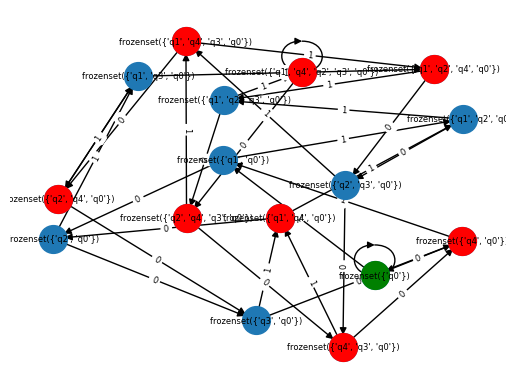

In [ ]:
draw_dfa(theDFA, start, final)

# ####string 

In [ ]:
def find_string(theDFA, start, final):
    def dfs(state, path):
        visited.add(state)
        if state in final and state not in visited_final:
            visited_final.add(state)
            all_paths.append(path)
        for symbol, next_state in theDFA[state].items():
            if next_state not in visited:
                dfs(next_state, path + [symbol])

    visited = set()
    visited_final = set()
    all_paths = []
    dfs(start, [])
    return all_paths

In [ ]:
path=find_string(theDFA, start, final)

In [ ]:
print(path)

[[1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 1, 0, 1], [1, 0, 0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]]


###string

In [ ]:
# so the string which pass for all states  is 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1